# Chlorophyll Observations at Seabird Nesting Sites
#### There are seventy listed seabird sites across the globe. We will aggregate the data in a 300km radius of these sites, and plot if necessary.

In [19]:
#load essential packages
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import geopy.distance

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs

#ignore cartopy style warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# if acquiring for the first time
ds_color = xr.open_dataset('https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v5.0-MONTHLY')

In [18]:
# open CSV of seabird nesting sites
locs = pd.read_csv('NSF_Seabirdsloc_Summer2022.csv')
sites = locs['Site']
locs

,Site,Location,Latitude,Longitude
0,Adams,New Zealand,-50.902700,166.001800
1,Admiralty,Antarctica,-62.177800,-58.444700
2,Aiktak,USA,54.188600,-164.840000
3,Alcatraz,USA,37.826670,-122.423330
4,Amsterdam,France,-37.816667,77.533330
...,...,...,...,...
65,"Hawaii (Laysan, for example)",USA,25.766153,-171.733205
66,Skomer,"Wales, UK",51.736899,-5.293144
67,UK,UK,54.086632,-4.591100
68,Iceland,Iceland,64.912449,-18.259384


In [37]:
df = pd.DataFrame(columns=['Year','Month']) # data order

for sit in range(len(sites)):
    maskr = get_mask(sit)
    siteName = sites[sit]
    yy = list()
    mm = list()
    cc = list()
    
    roundOff = 0 # decimal point to round to
    daySpecific = False # find last existing day of month, only if data is consistently not the first of the month

    # iterate through each year
    for year in range(1997,2021):
        # iterate through each month
        print(year)
        for month in range(1,13):
            # get the concentration at the site for the month
            iteratorTime = str(year) + "-" + str(month) + "-1"
            concentration = get_chlo_concentration_at_site(siteName, iteratorTime, plot=False, roundTo=roundOff)
            # add the concentration to the dataframe
            yy.append(year)
            mm.append(month)
            cc.append(concentration)
    
    if sit == 0:
        df['Year'] = yy
        df['Month'] = mm
    stn = 'SID'+str(sit)
    df[stn] = cc


Adams
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Admiralty
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2

2018
2019
2020
Eastern Egg Rock
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Foula
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011

2014
2015
2016
2017
2018
2019
2020
Outer Green
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Pelsaert
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2

2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
St. Lazaria
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
St. Paul
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
South Africa
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Hawaii (Laysan, for example)
Finding Region
Cutting Data
Creating Mask
1997
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-

In [25]:
def get_mask(sid):
    # get mask for a site id (index)
    # build a mask of 5 degrees circle around first site
    firstSite = sites[sid]
    print(sid, " ", firstSite)
    print("Finding Region")
    lat = locs['Latitude'][locs['Site'] == firstSite]
    lon = locs['Longitude'][locs['Site'] == firstSite]
    lats = [lat-5, lat+5]
    lons = [lon-5, lon+5]

    # convert to values
    lats = [float(i) for i in lats]
    lons = [float(i) for i in lons]

    # build dataframe to pull from
    data = ds_color.copy()

    print("Cutting Data")
    data = data['chlor_a'].sel(
        time = '2020-06-01',
        lon = slice(lons[0], lons[1]),
        lat = slice(lats[1], lats[0])
    ).load()

    # build mask for all points within geopy.distance.great_circle 300km
    print("Creating Mask")
    mask = np.zeros(data.shape)
    for i in range(data.lon.size):
        for j in range(data.lat.size):
            if geopy.distance.great_circle((data.lat[j].values, data.lon[i].values), (lat.values[0], lon.values[0])).km < 300:
                mask[j,i] = 1
                
    totalInsidePoints = np.sum(mask)
                
    return mask

In [26]:
def get_chlo_concentration_at_site(site, time, plot=False, roundTo=0):
    """
    Finds the average chlorophyll concentration in a 300km radius around seabird nesting sites
    Author: Austin
    Args:
      <Str> site: the name of the seabird nesting site
      <Str> time: the time of the data to be analyzed
      <Boolean> plot: prints plot
      <Integer> range: the radius of the area to count, in km
      <Integer> roundTo: the number of decimals to round to
    Returns:
      <Float> avgChLevel: the average chlorophyll concentration in the area
    """

    # copy to prevent overwriting
    data = ds_color.copy()

    # get the location of the site
    lon = locs.loc[sites[sites==site].index[0]].Longitude
    lat = locs.loc[sites[sites==site].index[0]].Latitude

    # for each location, select a region +-5 deg, all times
    lats = [float(lat-5), float(lat+5)]
    lons = [float(lon-5), float(lon+5)]


    # check if the time exists in the data
    # first, format the time
    time = pd.to_datetime(time)
    if time not in data['chlor_a'].time.values:
        print("Time not in data: " + str(time))
        return None
    
    # select the region with the timestep
    data = data['chlor_a'].sel(
        time = time,
        lon = slice(lons[0], lons[1]),
        lat = slice(lats[1], lats[0])
    ).load()

    # gets the distance between two points of lat,lon in km
    def get_distance(lat1, lon1, lat2, lon2):
        return geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).km

    # plot values only that are within 300 units of the (lat, lon)
    sumChLevels = 0;
    totalPointsInRange = 0;

    data = data * maskr
    
    for i in range(len(data.lat)):
        for j in range(len(data.lon)):
            # if the point exists in the mask
            if maskr[i,j] == 1:
                totalPointsInRange += 1
                item = data.values[i][j].item()
                if not np.isnan(item):
                    sumChLevels += item 

    # calculate the average
    if (totalPointsInRange > 0):
        avgChLevel = sumChLevels/totalPointsInRange
    else:
        return "No Data"

    region = np.array([
        [
            data.lat.min().values.item(),
            data.lat.max().values.item()
        ],
        [
            data.lon.min().values.item(),
            data.lon.max().values.item()
        ]
    ]) 

    if (plot == True):
        # Select a region of our data
        fig = plt.figure(figsize=(16,10), dpi = 72)
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Add coastlines
        states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')
        ax.coastlines(resolution='10m',linewidth=1,color='black')
        ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
        ax.add_feature(states_provinces, linewidth = 0.5)
        ax.add_feature(cfeature.BORDERS, color = 'black')
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
        ax.yaxis.set_major_formatter(LatitudeFormatter())
        ax.gridlines(linestyle = '--', linewidth = 0.5)

        # Add the data
        plt.title("Seabird Observation Locations")
        ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree())
        data.plot()
        plt.show()

    if ((totalPointsInRange / totalInsidePoints) < 0.2):
        print("Warning: At this timestep [" + time + "], less than 20% of the points are in the 300km radius")
    # round the average to the desired decimal place
    if (roundTo > 0):
        avgChLevel = np.round(avgChLevel, roundTo)
    return avgChLevel

In [39]:
df.to_csv('./allsites_allmonths_chloa300km.csv')


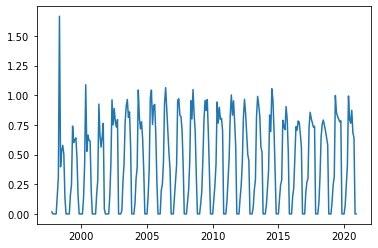

In [58]:
plt.plot(df['Year']+(df['Month']-1)/12,df['SID68'])

In [15]:
#This function will find the day given month an year
#Used in option 3
#This code doesnt matter since it corrects for 1997, but you cant actually call 1997 because austin dumb
#Will
def findDay(month, year):
    #Years start 1997, first month is september(9)
    id = (((int(year)-1997)*12)+int(month)-9)
    return(ds_color.time.dt.day.values[id])

"""
{EXAMPLE} Find the average chlorophyll level for a specific site (and plot the data)
"""
# [UNCOMMENT] get_chlo_concentration_at_site("Signy", time='2021-12-01', plot=True, roundTo=2)


"""
{EXAMPLE} Quick example of how to use the function for plotting
(This will iterate through each site and graph it)
"""
# [UNCOMMENT] for x in range(len(sites)):
#     print("Chlo Concentration at " + sites[x] + ": " + str(get_chlo_concentration_at_site(sites[x], '2020-06-01', plot=True, roundTo=2)))
#     print("\n")


"""
{EXAMPLE} Use the function to build a dataframe of a specific site's concentrations for each month in the timestep
"""
siteName = "Adams" # site to test chlo for
df = pd.DataFrame(columns=['Month', 'Concentration']) # data order
roundOff = 0 # decimal point to round to
daySpecific = False # find last existing day of month, only if data is consistently not the first of the month

timestep = input("Compute: \n[1] Years Only (1997-2021)\n[2] Each Month in Year")
if (timestep == "1"):
    # iterate through each year
    for year in range(1997,2021):
        # iterate through each month
        for month in range(1,13):
            # get the concentration at the site for the month
            if (daySpecific):
                iteratorTime = str(year) + "-" + str(month) + "-0" + str(findDay(month, year))
            else:
                iteratorTime = str(year) + "-" + str(month) + "-1"
            concentration = get_chlo_concentration_at_site(siteName, iteratorTime, plot=False, roundTo=roundOff)
            # add the concentration to the dataframe
            df = df.append({'Month': str(year) + "-" + str(month), 'Concentration': concentration}, ignore_index=True)
elif (timestep == "2"):
    year = input("Select Year [1997-2021]: ")
    # iterate through each month
    for month in range(1,13):
        if (daySpecific):
            iteratorTime = str(year) + "-" + str(month) + "-0" + str(findDay(month, year))
        else:
            iteratorTime = str(year) + "-" + str(month) + "-0-1"
        # get the concentration at the site for the month
        concentration = get_chlo_concentration_at_site(siteName, iteratorTime, plot=False, roundTo=roundOff)
        # add the concentration to the dataframe
        df = df.append({'Month': str(year) + "-" + str(month), 'Concentration': concentration}, ignore_index=True)
else:
    print("Invalid Input, exiting...")

# first timestep available 1997-09-04
# last timestep available 2021-12-01

df

Compute: 
[1] Years Only (1997-2021)
[2] Each Month in Year1
Time not in data: 1997-01-01 00:00:00
Time not in data: 1997-02-01 00:00:00
Time not in data: 1997-03-01 00:00:00
Time not in data: 1997-04-01 00:00:00
Time not in data: 1997-05-01 00:00:00
Time not in data: 1997-06-01 00:00:00
Time not in data: 1997-07-01 00:00:00
Time not in data: 1997-08-01 00:00:00
Time not in data: 1997-09-01 00:00:00


,Month,Concentration
0,1997-1,None
1,1997-2,None
2,1997-3,None
3,1997-4,None
4,1997-5,None
...,...,...
283,2020-8,0.130222
284,2020-9,0.175936
285,2020-10,0.208347
286,2020-11,0.453885


# TODO
1. Convert mask method to NANs in the dataframe, then multiply the lat/lon data with it to see what points are vavlid. REDUCE the 1:30 per year time to way less.

In [17]:
# Useful for seeing what timesteps are avilable
ds_color.time.dt.day

<xarray.DataArray 'day' (time: 292)>
array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])
Coordinates:
  * time     (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2021-12-01